## Lession 11: Network robustness

We will show how to analyse the effects of:
1. random errors on Barabasi-Albert (BA) and Erdos-Renyi (ER) networks
2. random errors on some real complex networks
3. attacks on BA, ER and real complex networks <br>

We will simulate Failure Propagation Model on a ER graphs <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rn

### 1. Percolation on BA networks`

We will generate a BA network and simulate site percolation process on it for different $f$. <br>
<br>
For each value of $f$ we will simulate percolation process $S$ times and calculate the average results for the size of giant component and avreage shortest path. <br>

**BA network with $m=2$ and $N=1000$**

In [2]:
BA=nx.barabasi_albert_graph(1000,2)

Calculate $\langle k \rangle$, $\langle k^{2} \rangle$ and $f_{c}$

In [3]:
q=[]
for v in BA.nodes():
    q.append(BA.degree(v))
a=np.array(q)
b=np.power(a,2)
fc=1.0-1.0/(np.mean(b)/np.mean(a)-1)
print("Precolation treshold is", fc)
print("Average shortest path is", nx.average_shortest_path_length(BA))

Precolation treshold is 0.9022957560330902
Average shortest path is 4.0585645645645645


**The size of the giant component**

In [4]:
lccBA=max(nx.connected_components(BA), key=len)
print("The size of the giant component is", len(lccBA))

The size of the giant component is 1000


We will create a list of percolation probabilities

In [5]:
fx=[]
lBAo=[]
for i in range(1,20):
    fx.append(i*0.05)
    lBAo.append(4.0585645645645645)
print(fx)

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001]


In [6]:
GCsBA=[]
GCsBA_er=[]
lBA=[]
lBA_er=[]
for f in fx:
    data=[]
    ldata=[]
    #We will run percolation process simulation for each f 2 times due to time constraints
    for i in range(0,2):
        nd=[]
        #We select nodes that will remain in the network with probability 1-f
        for u in BA.nodes():
            ksi=rn.uniform(0,1)
            if f<ksi:
                nd.append(u)
        #We create a new graph as a subgraph of original BA network based on selected nodes
        G=nx.Graph()
        for u in nd:
            for v in BA.neighbors(u):
                if v in nd:
                    G.add_edge(u,v)
        #calculate the size of the giant component
        lcc=max(nx.connected_components(G), key=len)
        x=(1.0*len(lcc))/(1.0*len(lccBA))
        data.append(x)
        #calculate the average shortest path. Keep in mind that the network is probably disconnected
        SB=G.subgraph(lcc)
        ldata.append(nx.average_shortest_path_length(SB))
    a=np.array(data)
    b=np.array(ldata)
    GCsBA.append(np.mean(a))
    GCsBA_er.append(np.std(a,ddof=1))
    lBA.append(np.mean(b))
    lBA_er.append(np.std(b,ddof=1))

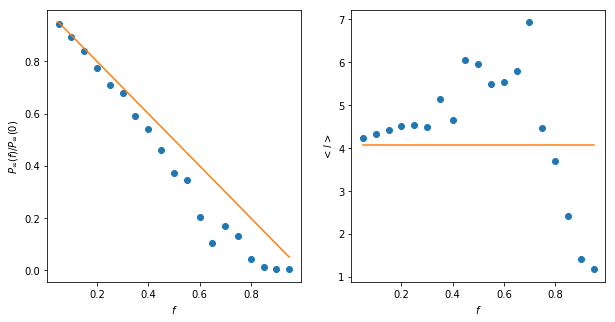

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx,GCsBA,"o", label="size of giant component"  )
plt.plot(fx, 1-np.array(fx),"-")

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx,lBA,"o", label="shorthest path" )
plt.plot(fx,lBAo,"-", label="original" )
plt.show()

### 2. Percolation on Erods-Renyi graph 

**Create ER graph with $\langle k \rangle=4$ and $N=1000$**

In [8]:
ER=nx.erdos_renyi_graph(1000,0.004)

Calculate $\langle k \rangle$, $\langle k^{2} \rangle$ and $f_{c}$

In [9]:
q=[]
for v in ER.nodes():
    q.append(ER.degree(v))
a=np.array(q)
b=np.power(a,2)
fc=1.0-1.0/(np.mean(b)/np.mean(a)-1)
print("Precolation treshold is", fc)

Precolation treshold is 0.745982774135493


**Average shortest path**

In [10]:
lccER=max(nx.connected_components(ER), key=len)
SB=ER.subgraph(lccER)
print("Average shortest path is", nx.average_shortest_path_length(SB))

Average shortest path is 5.147183450944732


In [14]:
lERo=[]
for i in range(1,20):
    lERo.append(5.147183450944732)

In [11]:
GCsER=[]
lER=[]
for f in fx:
    data=[]
    ldata=[]
    #We will run percolation process simulation for each f 2 times due to time constraints
    for i in range(0,2):
        nd=[]
        #We select nodes that will remain in the network with probability 1-f
        for u in ER.nodes():
            ksi=rn.uniform(0,1)
            if f<ksi:
                nd.append(u)
        #We create a new graph as a subgraph of original BA network based on selected nodes
        G=nx.Graph()
        for u in nd:
            for v in ER.neighbors(u):
                if v in nd:
                    G.add_edge(u,v)
        #calculate the size of the giant component
        lcc=max(nx.connected_components(G), key=len)
        x=(1.0*len(lcc))/(1.0*len(lccER))
        data.append(x)
        #calculate the average shortest path. Keep in mind that the network is probably disconnected
        SB=G.subgraph(lcc)
        ldata.append(nx.average_shortest_path_length(SB))
    a=np.array(data)
    b=np.array(ldata)
    GCsER.append(np.mean(a))
    lER.append(np.mean(b))

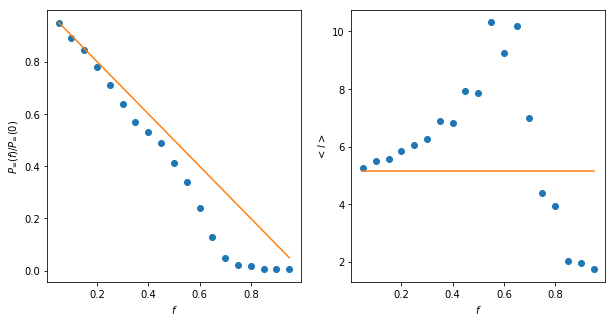

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx,GCsER,"o", label="size of giant component"  )
plt.plot(fx, 1-np.array(fx),"-")

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx,lER,"o", label="shorthest path" )
plt.plot(fx,lERo,"-", label="original" )
plt.show()

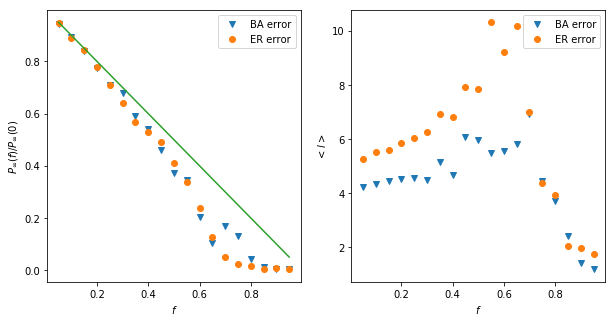

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx,GCsBA,"v", label="BA error"  )
plt.plot(fx,GCsER,"o", label="ER error"  )
plt.legend()
plt.plot(fx, 1-np.array(fx),"-")

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx,lBA,"v", label="BA error" )
plt.plot(fx,lER,"o", label="ER error" )
plt.legend()
plt.show()

### 3. Percolation on London transportation network

Network is multiplex but we will consider it as unweighted, monoplex network for the purpose of this leacture

In [18]:
edgesLT=pd.read_csv("../data/london_transport/edges.csv")

In [19]:
LT= nx.from_pandas_edgelist(edgesLT, '# source', ' target', create_using=nx.Graph())

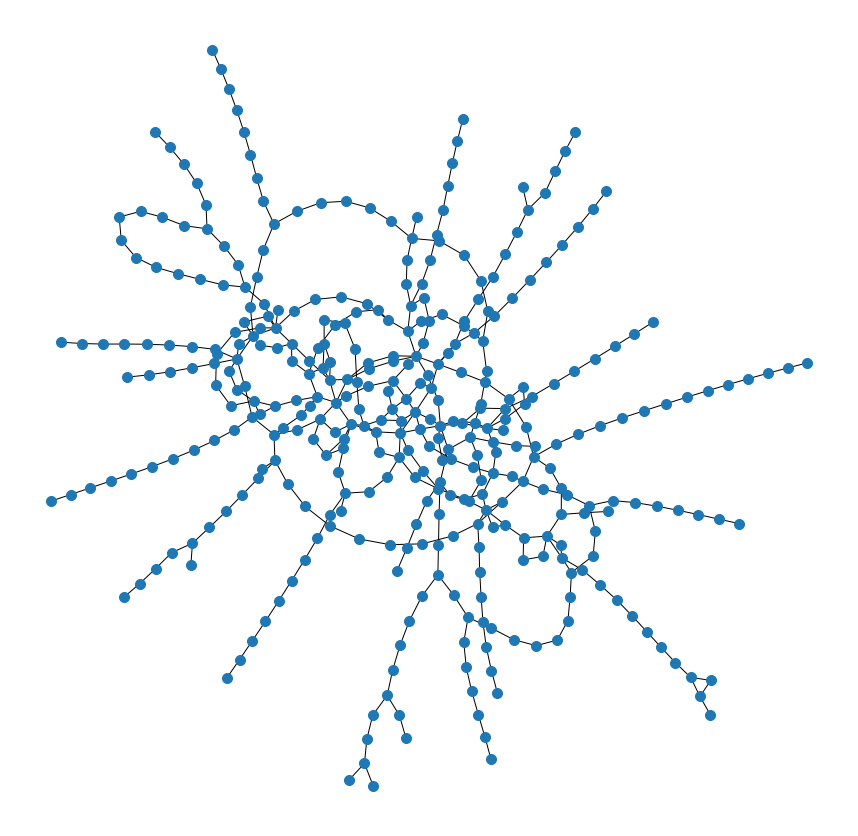

In [20]:
plt.figure(figsize =(15, 15))
posLT=nx.kamada_kawai_layout(LT)
nx.draw_networkx_nodes(LT, pos=posLT, node_size=100)
nx.draw_networkx_edges(LT,pos=posLT)
plt.box(False)
plt.show()

Calculate $\langle k \rangle$, $\langle k^{2} \rangle$ and $f_{c}$

In [21]:
q=[]
for v in LT.nodes():
    q.append(LT.degree(v))
a=np.array(q)
b=np.power(a,2)
fc=1.0-1.0/(np.mean(b)/np.mean(a)-1)
print("Precolation treshold is", fc)

Precolation treshold is 0.4364351245085192


**Average shortest path**

In [22]:
lccLT=max(nx.connected_components(LT), key=len)
SB=LT.subgraph(lccLT)
print("Average shortest path is", nx.average_shortest_path_length(SB))

Average shortest path is 13.732738305643926


In [23]:
GCsLT=[]
lLT=[]
for f in fx:
    if 0.45<=f:
        break
    data=[]
    ldata=[]
    #We will run percolation process simulation for each f 2 times due to time constraints
    for i in range(0,2):
        nd=[]
        #We select nodes that will remain in the network with probability 1-f
        for u in LT.nodes():
            ksi=rn.uniform(0,1)
            if f<ksi:
                nd.append(u)
        #We create a new graph as a subgraph of original BA network based on selected nodes
        G=nx.Graph()
        for u in nd:
            for v in LT.neighbors(u):
                if v in nd:
                    G.add_edge(u,v)
        #calculate the size of the giant component
        lcc=max(nx.connected_components(G), key=len)
        x=(1.0*len(lcc))/(1.0*len(lccLT))
        data.append(x)
        #calculate the average shortest path. Keep in mind that the network is probably disconnected
        SB=G.subgraph(lcc)
        ldata.append(nx.average_shortest_path_length(SB))
    a=np.array(data)
    b=np.array(ldata)
    GCsLT.append(np.mean(a))
    lLT.append(np.mean(b))

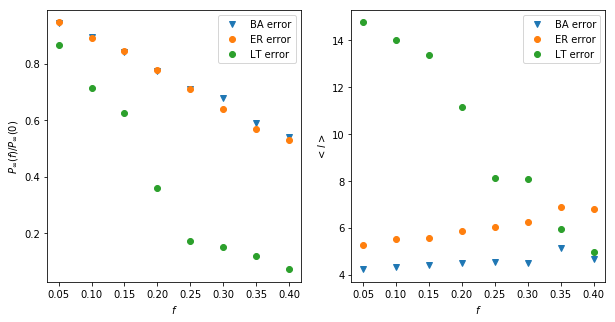

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx[0:8],GCsBA[0:8],"v", label="BA error"  )
plt.plot(fx[0:8],GCsER[0:8],"o", label="ER error"  )
plt.plot(fx[0:8],GCsLT,"o", label="LT error"  )

plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx[0:8],lBA[0:8],"v", label="BA error" )
plt.plot(fx[0:8],lER[0:8],"o", label="ER error" )
plt.plot(fx[0:8],lLT,"o", label="LT error" )
plt.legend()
plt.show()

### 4. Attacks on BA, ER and London transport networks

First we need to order nodes according to their degree

In [25]:
degER={}
for v in ER.nodes():
    degER[v]=ER.degree(v)

In [26]:
degBA={}
for v in BA.nodes():
    degBA[v]=BA.degree(v)

In [27]:
degLT={}
for v in LT.nodes():
    degLT[v]=LT.degree(v)

In [28]:
import operator
import math as mt
sorted_degER=sorted(degER.items(), key=operator.itemgetter(1), reverse=True)
sorted_degBA=sorted(degBA.items(), key=operator.itemgetter(1), reverse=True)
sorted_degLT=sorted(degLT.items(), key=operator.itemgetter(1), reverse=True)

In [30]:
print(sorted_degER)

[(53, 10), (565, 10), (112, 9), (146, 9), (151, 9), (171, 9), (220, 9), (387, 9), (429, 9), (566, 9), (692, 9), (725, 9), (859, 9), (904, 9), (12, 8), (20, 8), (52, 8), (62, 8), (81, 8), (123, 8), (129, 8), (132, 8), (178, 8), (209, 8), (234, 8), (242, 8), (328, 8), (333, 8), (384, 8), (513, 8), (521, 8), (590, 8), (610, 8), (618, 8), (622, 8), (645, 8), (681, 8), (685, 8), (719, 8), (731, 8), (758, 8), (782, 8), (788, 8), (824, 8), (840, 8), (887, 8), (903, 8), (935, 8), (937, 8), (941, 8), (979, 8), (984, 8), (13, 7), (16, 7), (40, 7), (54, 7), (59, 7), (69, 7), (79, 7), (80, 7), (83, 7), (173, 7), (205, 7), (210, 7), (235, 7), (279, 7), (302, 7), (307, 7), (313, 7), (353, 7), (379, 7), (390, 7), (413, 7), (423, 7), (438, 7), (450, 7), (556, 7), (559, 7), (570, 7), (574, 7), (577, 7), (584, 7), (678, 7), (680, 7), (698, 7), (705, 7), (710, 7), (764, 7), (765, 7), (808, 7), (814, 7), (829, 7), (855, 7), (858, 7), (863, 7), (921, 7), (942, 7), (953, 7), (985, 7), (2, 6), (36, 6), (47, 

In [32]:
GCsBA_a=[]
lBA_a=[]
for f in fx[0:8]:
    #number of nodes that we will remove for each f
    n=int(mt.ceil(BA.number_of_nodes()*f))
    nd=[]
    #We select nodes that will remain in the network 
    for u in sorted_degBA[n:]:
        nd.append(u[0])
    #We create a new graph as a subgraph of original BA network based on selected nodes
    G=nx.Graph()
    for u in nd:
        for v in BA.neighbors(u):
            if v in nd:
                G.add_edge(u,v)
    #calculate the size of the giant component
    lcc=max(nx.connected_components(G), key=len)
    x=(1.0*len(lcc))/(1.0*len(lccBA))
    GCsBA_a.append(x)
    #calculate the average shortest path. Keep in mind that the network is probably disconnected
    SB=G.subgraph(lcc)
    lBA_a.append(nx.average_shortest_path_length(SB))

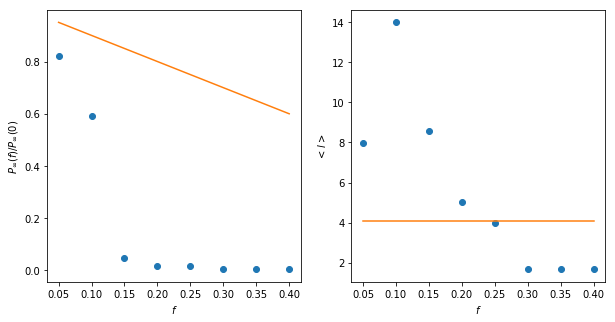

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx[0:8],GCsBA_a,"o", label="size of giant component"  )
plt.plot(fx[0:8], 1-np.array(fx[0:8]),"-")

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx[0:8],lBA_a,"o", label="shorthest path" )
plt.plot(fx[0:8],lBAo[0:8],"-", label="original" )
plt.show()

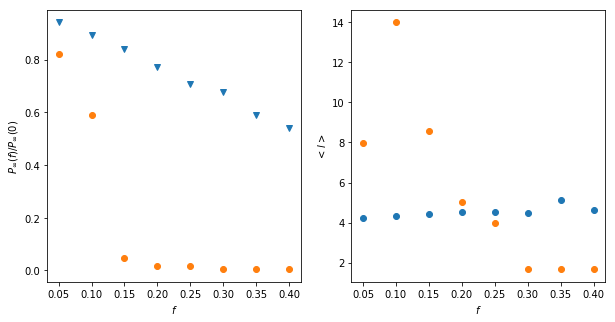

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx[0:8],GCsBA[0:8],"v", label="BA error"  )
plt.plot(fx[0:8],GCsBA_a,"o", label="BA attack"  )

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx[0:8],lBA[0:8],"o", label="BA error" )
plt.plot(fx[0:8],lBA_a,"o", label="BA attack" )

plt.show()

In [38]:
GCsER_a=[]
lER_a=[]
for f in fx[0:10]:
    #number of nodes that we will remove for each f
    n=int(mt.ceil(ER.number_of_nodes()*f))
    nd=[]
    #We select nodes that will remain in the network 
    for u in sorted_degER[n:]:
        nd.append(u[0])
    #We create a new graph as a subgraph of original BA network based on selected nodes
    G=nx.Graph()
    for u in nd:
        for v in ER.neighbors(u):
            if v in nd:
                G.add_edge(u,v)
    #calculate the size of the giant component
    lcc=max(nx.connected_components(G), key=len)
    x=(1.0*len(lcc))/(1.0*len(lccER))
    GCsER_a.append(x)
    #calculate the average shortest path. Keep in mind that the network is probably disconnected
    SB=G.subgraph(lcc)
    lER_a.append(nx.average_shortest_path_length(SB))

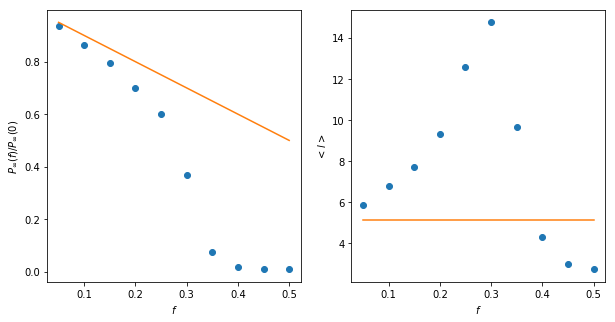

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx[0:10],GCsER_a,"o", label="size of giant component"  )
plt.plot(fx[0:10], 1-np.array(fx[0:10]),"-")

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx[0:10],lER_a,"o", label="shorthest path" )
plt.plot(fx[0:10],lERo[0:10],"-", label="original" )
plt.show()

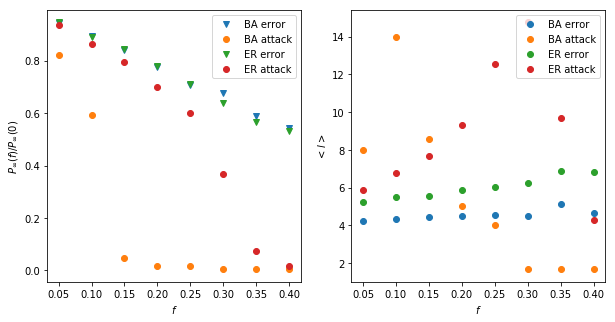

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx[0:8],GCsBA[0:8],"v", label="BA error"  )
plt.plot(fx[0:8],GCsBA_a,"o", label="BA attack"  )
plt.plot(fx[0:8],GCsER[0:8],"v", label="ER error"  )
plt.plot(fx[0:8],GCsER_a[0:8],"o", label="ER attack"  )
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx[0:8],lBA[0:8],"o", label="BA error" )
plt.plot(fx[0:8],lBA_a,"o", label="BA attack" )
plt.plot(fx[0:8],lER[0:8],"o", label="ER error" )
plt.plot(fx[0:8],lER_a[0:8],"o", label="ER attack" )
plt.legend()

plt.show()

In [44]:
GCsLT_a=[]
lLT_a=[]
for f in fx[0:10]:
    #number of nodes that we will remove for each f
    n=int(mt.ceil(LT.number_of_nodes()*f))
    nd=[]
    #We select nodes that will remain in the network 
    for u in sorted_degLT[n:]:
        nd.append(u[0])
    #We create a new graph as a subgraph of original BA network based on selected nodes
    G=nx.Graph()
    for u in nd:
        for v in LT.neighbors(u):
            if v in nd:
                G.add_edge(u,v)
    #calculate the size of the giant component
    lcc=max(nx.connected_components(G), key=len)
    x=(1.0*len(lcc))/(1.0*len(lccLT))
    GCsLT_a.append(x)
    #calculate the average shortest path. Keep in mind that the network is probably disconnected
    SB=G.subgraph(lcc)
    lLT_a.append(nx.average_shortest_path_length(SB))

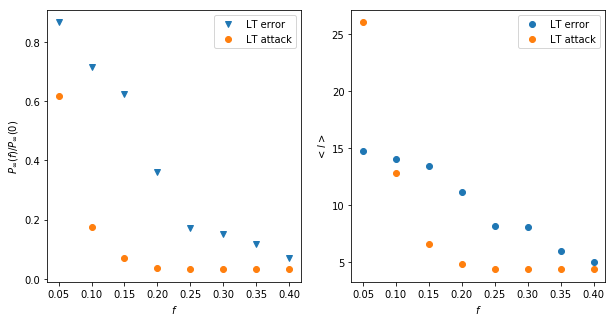

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$f$")
plt.ylabel('$P_{\infty}(f)/P_{\infty}(0)$')
plt.plot(fx[0:8],GCsLT,"v", label="LT error"  )
plt.plot(fx[0:8],GCsLT_a[0:8],"o", label="LT attack"  )
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$f$")
plt.ylabel('$<l>$')
plt.plot(fx[0:8],lLT,"o", label="LT error" )
plt.plot(fx[0:8],lLT_a[0:8],"o", label="LT attack" )
plt.legend()
plt.show()

### 5. Failure Propagation Model on ER graphs

In [59]:
av=[]
avT=[]
for s in range(0,1000):
    #print(s)
    #Lower critical limit
    #G=nx.erdos_renyi_graph(500,0.0021)
    #Upper critical limit
    G=nx.erdos_renyi_graph(500,0.01152)
    #Subcritical
    #G=nx.erdos_renyi_graph(500,0.02)
    #Supercritical
    #G=nx.erdos_renyi_graph(500,0.006)
    avS=0
    active=[]
    status={}
    phi={}
    for u in G.nodes():
        status[u]=0
        active.append(u)
        phi[u]=0.18 
    stop=0
    while stop==0:
        v=rn.randint(0,G.number_of_nodes()-1)
        if G.degree(v)>0:
            status[v]=1
            active.remove(v)
            cc=nx.node_connected_component(G,v)
            nd=list(cc)
            SB=G.subgraph(cc)
            stop=1
    stop=0
    t=0
    len_ac=len(active)
    count=0
    while stop==0:
        t+=1
        ind=rn.randint(0,len(nd)-1)
        v=nd[ind]
        if status[v]==0:
            sum=0
            for u in SB.neighbors(v):
                if status[u]==1:
                    sum+=1
            if SB.degree(v)>0:
                ksi=(1.0*sum)/(1.0*SB.degree(v))
                #print(t,v,ksi)
                if phi[v]<=ksi:
                    status[v]=1
                    active.remove(v)
        if len(active)<len_ac:
            count=0
            len_ac=len(active)
        else:
            count+=1
        if count==1000:
            stop=1
            av.append(G.number_of_nodes()-len(active))
            avT.append(t-1000)        

In [60]:
bn=[]
for i in range(1,501):
    bn.append(i)

In [61]:
hist, bin_edges = np.histogram(np.array(av), bins=bn, density=True)

In [62]:
avT.sort()
print(avT[0],avT[-1])

0 11398


In [63]:
histT, bin_edgesT = np.histogram(np.array(avT), bins=11398, density=True)
len(bin_edgesT)

11399

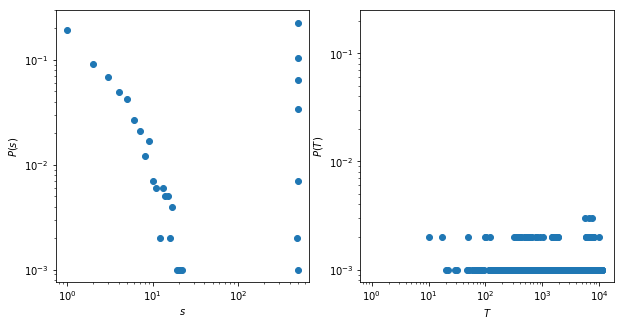

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$s$")
plt.ylabel('$P(s)$')
plt.yscale("log")
plt.xscale("log")
plt.plot(bin_edges[0:499],hist,"o", label="Avalanche size")

plt.subplot(1,2,2)
plt.xlabel("$T$")
plt.ylabel('$P(T)$')
plt.yscale("log")
plt.xscale("log")
plt.plot(bin_edgesT[0:11398],histT,"o", label="Avalanche duration")
plt.show()
